# <p style="text-align: center;">Bike Sharing Assignmnet

A US Bike Sharing company Boom Bikes faced considerable dip's due to Carona pandemic. So, The company want's to know what factors/variables affecting the demand for shared bikes. Based on past 2018 and 2019 data. 

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

spring season - transition season from winter to summer 
<br>
fall - transition into winter from summer

###### Dataset has data from 1-1-2018 to 31-12-2019

In [363]:
#importing necessary libraries
import pandas as pd
import numpy as np

# libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Scikit learn library
import sklearn
from sklearn.model_selection import train_test_split

# To get statistical information of variables
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Rescaling Libray
from sklearn.preprocessing import MinMaxScaler

# R squared to evaluate the model
from sklearn.metrics import r2_score

# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



In [364]:
# reading data as pandas DataFrame
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [365]:
bikes.shape

(730, 16)

In [366]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning, Understanding and Visualising

In [367]:
# null value check
bikes.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data Dictionary
- instant - Index of dataset
- dteday - date
- season 
    - 1:Spring
    - 2:Summer
    - 3:Fall
    - 4:Winter
- yr 
    - 0:2018
    - 1:2019
- mnth - 1 to 12
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    - 1 - holiday
    - 0 - not a holiday
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual - number of users who made a rental
- registered - number of reg users who made a booking on a given day
- cnt - Total number of bike rentals indicating both casual and registered

- extra info
    - The absolute humidity unit is given as g.m-3, which is units of grams of water vapour per cubic metre of air.

In [368]:
bikes.windspeed.value_counts()

windspeed
9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: count, Length: 649, dtype: int64

- to-do
   - convert weathersit and season columns to categorical
    

In [369]:
# Dropping date column, as year and month are already available
bikes.drop('dteday', axis=1, inplace = True)

In [370]:
bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [371]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


In [372]:
# Convert Weathersit and season columns to categorical
bikes.weathersit = bikes.weathersit.apply(lambda x : str(x))
bikes.season= bikes.season.apply(lambda x : str(x))


In [373]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 85.7+ KB


In [374]:
bikes.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [375]:
bikes.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [376]:
# drop columns with All unique values
bikes.drop('instant',axis=1, inplace=True)

# dropping rescaling and casual as cnt itself indicating both registered and casual data.
bikes.drop(['registered', 'casual'], axis=1, inplace=True)


In [377]:
# temp and atemp are linearly related with cnt

<Figure size 1500x800 with 0 Axes>

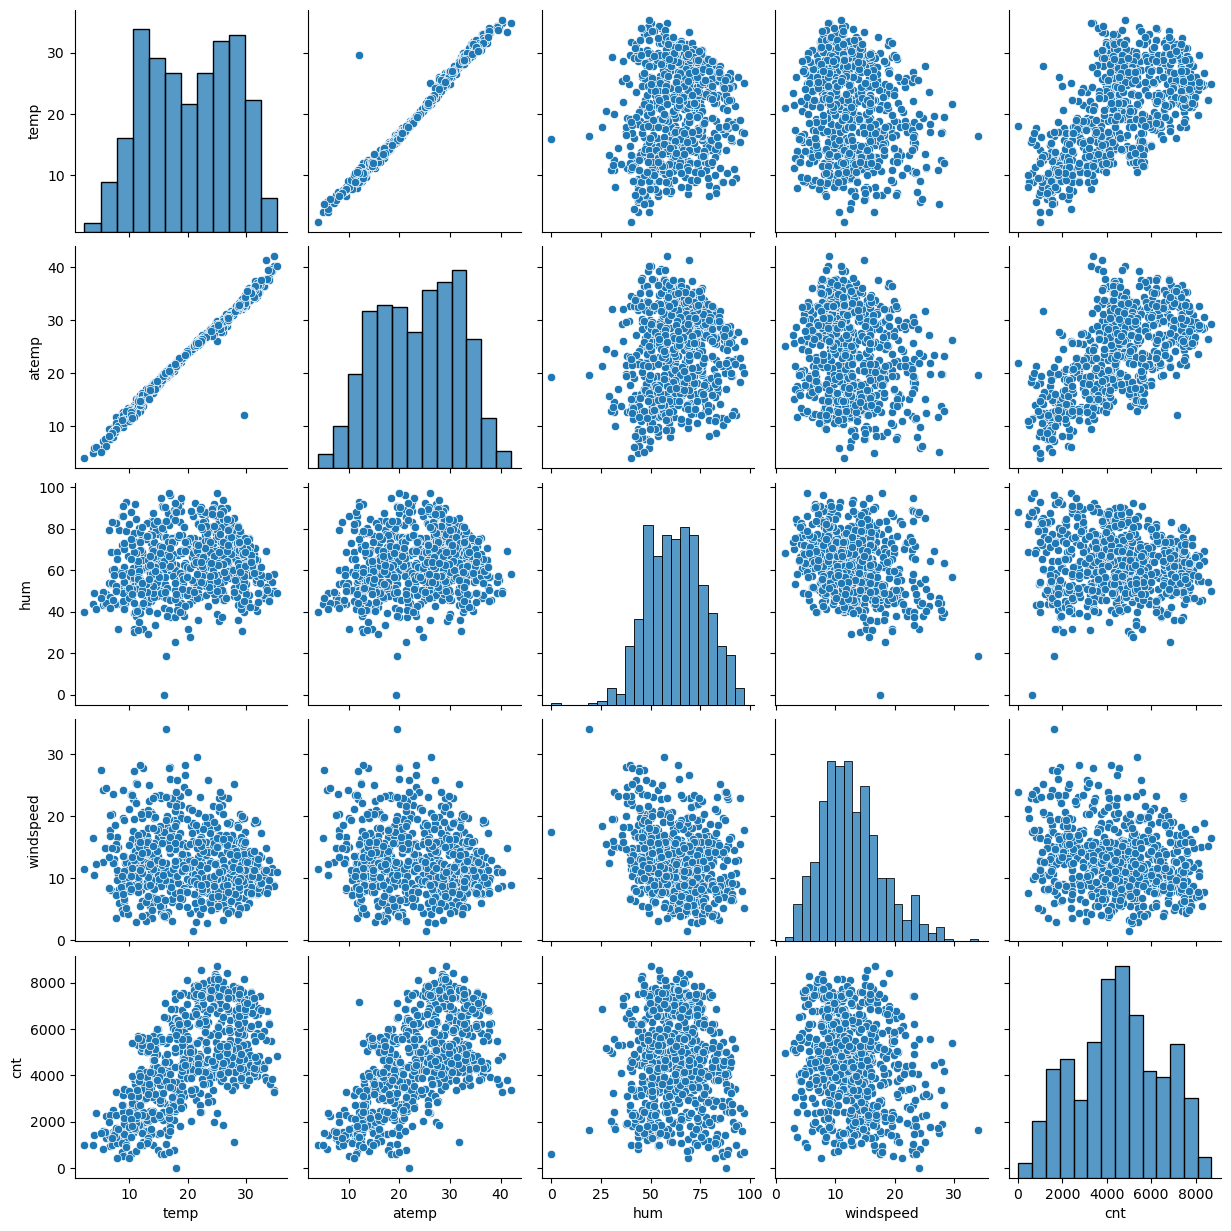

In [378]:
# Pairplot between numerical columns
plt.figure(figsize=[15,8])
sns.pairplot(bikes[num_vars])
plt.show()

<Axes: >

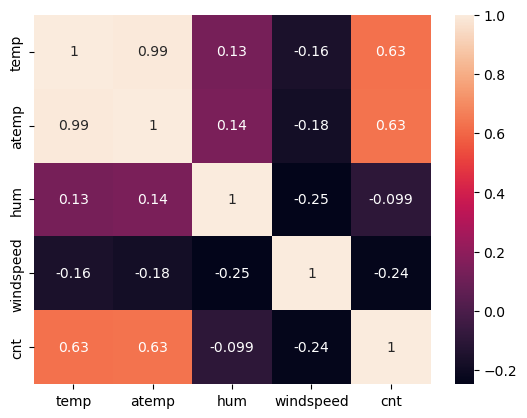

In [379]:
# correlation
sns.heatmap(bikes[num_vars].corr(), annot=True)

###### Positive correlation
- temperature and assumed temperature are highly correlated
- count is positively correlated with temperature, assumed temperature

###### Negative Correlation
- count negatively correlated with Humidity and windspeed.

In [380]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [381]:
# mapping meaningful names to binary values. For season,month,weekday and weathersit variable's values.So that, while creating dummy variables, It is easy to understand the variables names.

In [382]:
bikes.season = bikes.season.map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'})

In [383]:
bikes.mnth = bikes.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [384]:
bikes.weekday = bikes.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [385]:
bikes.weathersit = bikes.weathersit.map({'1':'clear','2':'misty','3':'light_rain_thunderstorm', '4':'heavy_rains'})

In [386]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [387]:
bikes[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


Box plot of temperature


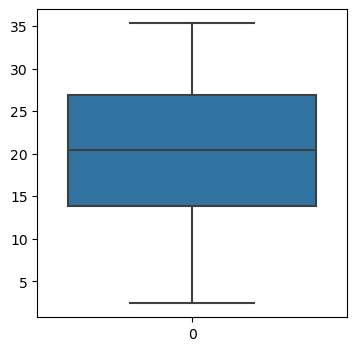

In [388]:
# Univariate Analysis on numerical variables
plt.figure(figsize=[4,4])
sns.boxplot(bikes['temp'])
print("Box plot of temperature")


Box plot of assumed temperature


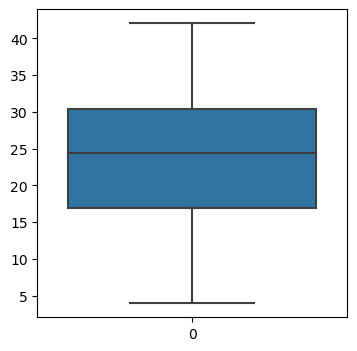

In [389]:
plt.figure(figsize=[4,4])
sns.boxplot(bikes['atemp'])
print("Box plot of assumed temperature")

Box plot of Humidity


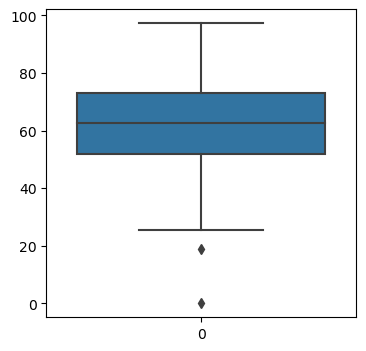

In [390]:
plt.figure(figsize=[4,4])
sns.boxplot(bikes['hum'])
print("Box plot of Humidity")
# Those are potential outliers, No need to remove them

Box plot of windspeed


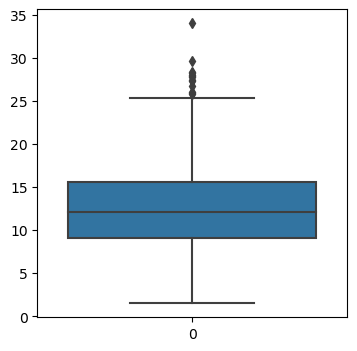

In [391]:
plt.figure(figsize=[4,4])
sns.boxplot(bikes['windspeed'])
print("Box plot of windspeed")
# Having high windspeed is common in different weather conditions, considering those as potential outliers

Box plot of count


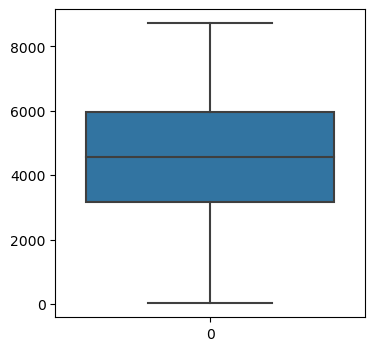

In [392]:
plt.figure(figsize=[4,4])
sns.boxplot(bikes['cnt'])
print("Box plot of count")

In [393]:
cat_vars

['mnth', 'holiday', 'weekday', 'workingday', 'yr', 'weathersit', 'season']

countplot of months


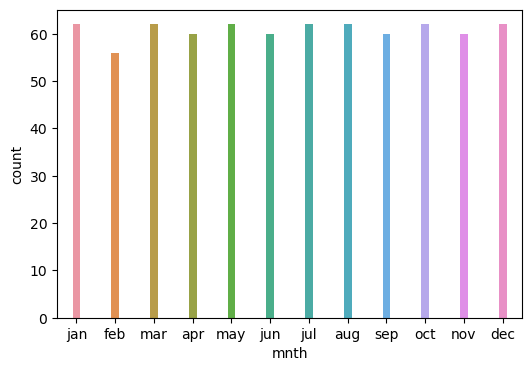

In [394]:
# univariate on categorical
plt.figure(figsize=[6,4])
sns.countplot(x = bikes.mnth, width=0.2)
print("countplot of months")

count plot of holiday


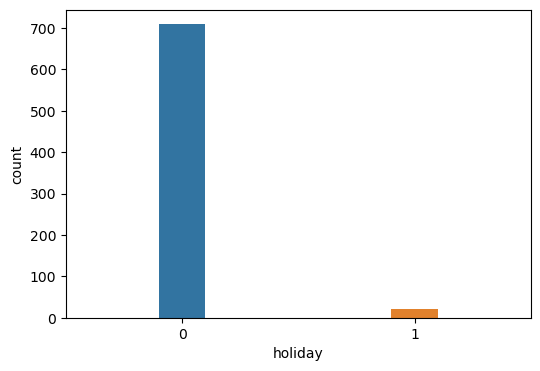

In [395]:
plt.figure(figsize=[6,4])
sns.countplot(x = bikes.holiday, width=0.2)
print("count plot of holiday")

Count plot of weekday


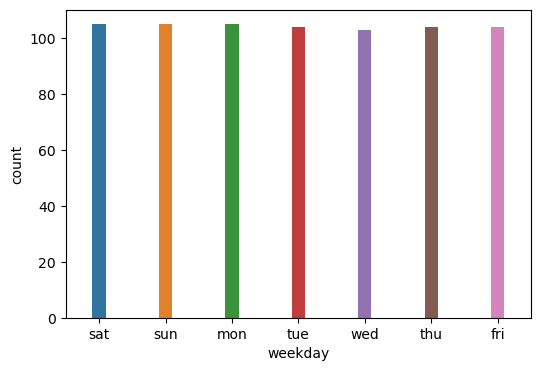

In [396]:
plt.figure(figsize=[6,4])
sns.countplot(x = bikes.weekday, width=0.2)
print("Count plot of weekday")

Count plot of workingday


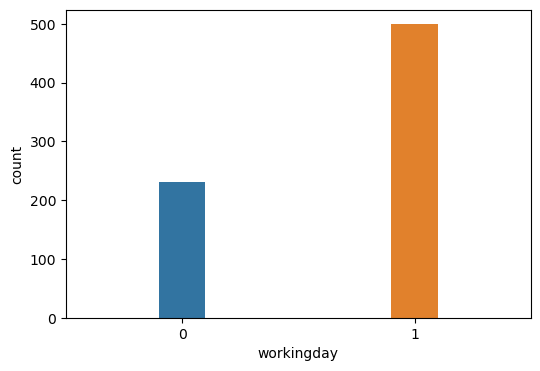

In [397]:
plt.figure(figsize=[6,4])
sns.countplot(x = bikes.workingday, width=0.2)
print("Count plot of workingday")

Count plot of weather situation


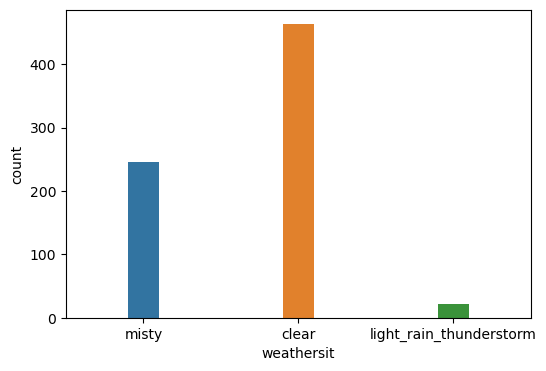

In [398]:
plt.figure(figsize=[6,4])
sns.countplot(x = bikes.weathersit, width=0.2)
print("Count plot of weather situation")

Count plot of season


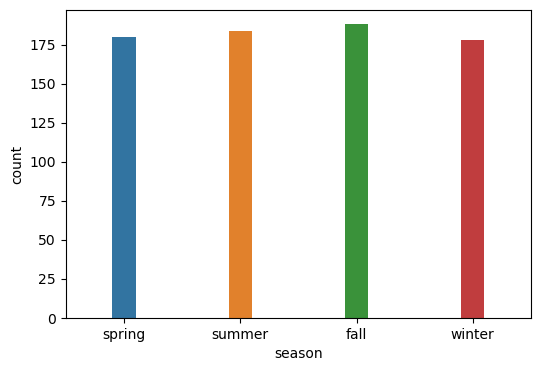

In [399]:
plt.figure(figsize=[6,4])
sns.countplot(x = bikes.season, width=0.2)
print("Count plot of season")

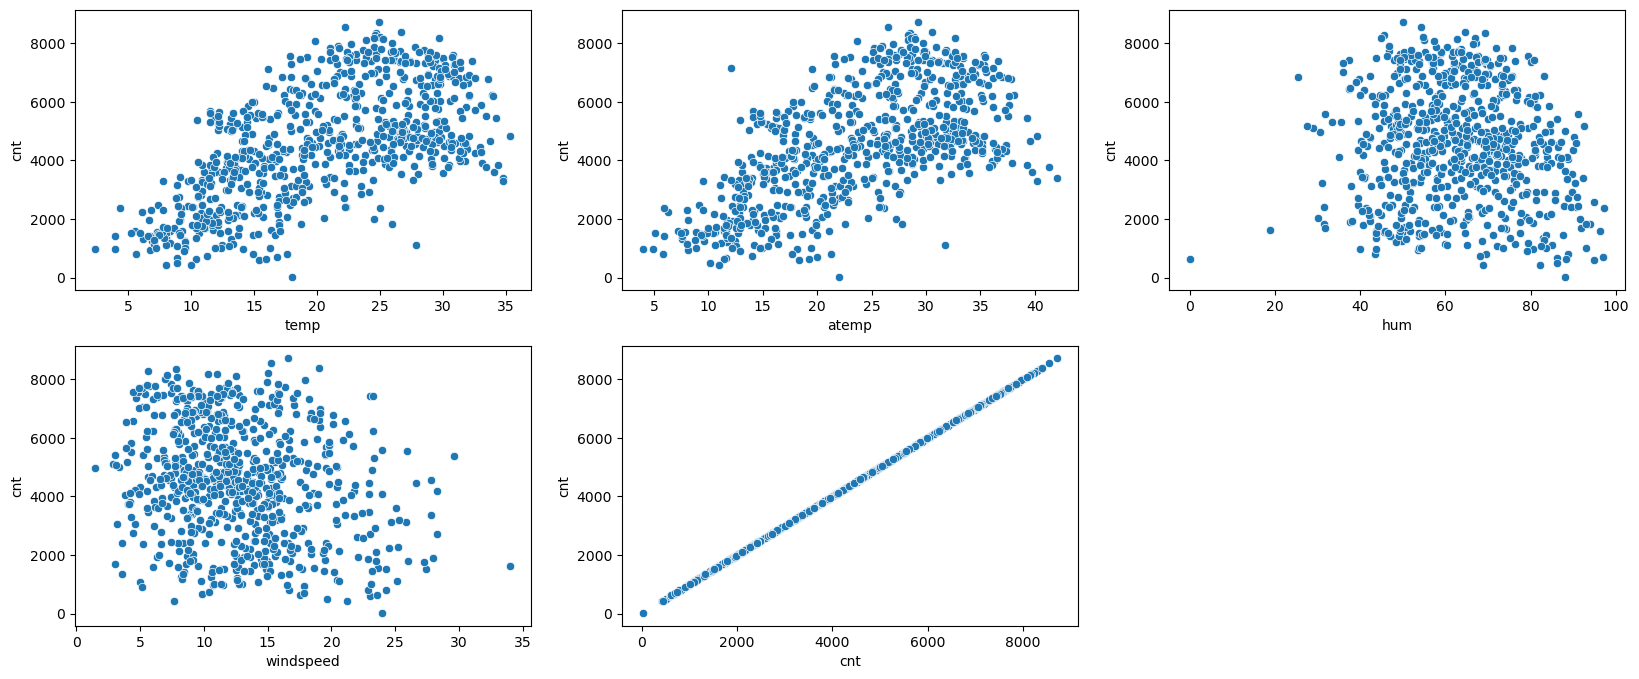

In [400]:
# Bivariate on numerical columns vs Target column (Count)
# Visualising numerical columns
num_vars = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize = (20,8))

for i in range(len(num_vars)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(data = bikes, x = num_vars[i], y = 'cnt')


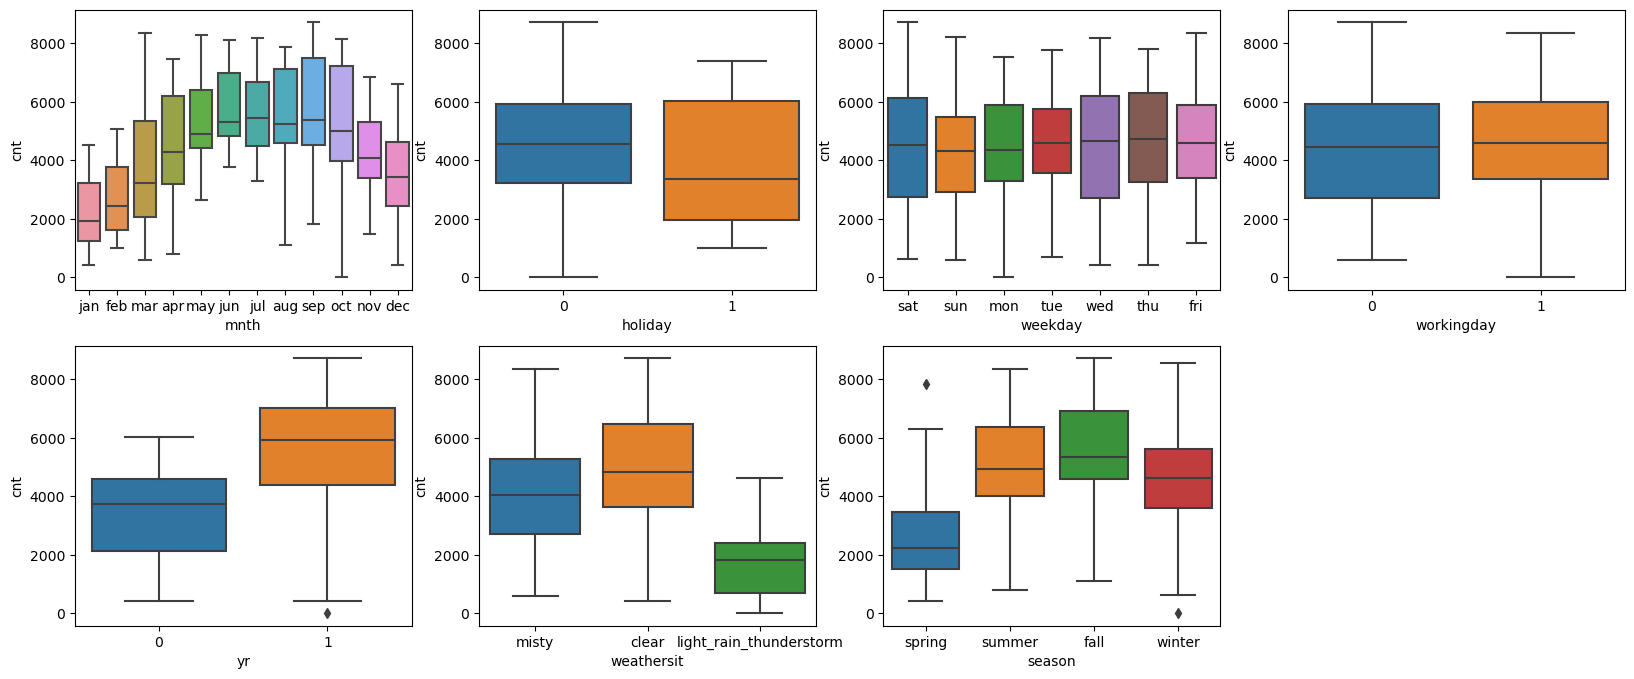

In [401]:
# Bivariate Analysis on categorical vs target variable(count)
cat_vars = ['mnth', 'holiday', 'weekday', 'workingday', 'yr', 'weathersit', 'season']

# plotting categorical columns 

plt.figure(figsize = (20,8))

for i in range(len(cat_vars)):
    plt.subplot(2,4,i+1)
    sns.boxplot(data = bikes, x = cat_vars[i], y = 'cnt')


In [402]:
# During Fall, count is high in number
# count is high when, weather is clear with few clouds and partly cloudy 

In [403]:
# To do
# create dummy variables for categorical with more than 2 values

### Preparing The data for modelling

- Encoding
    - Converting binary vars to 1/0
    - converting other categorical to dummy vars
- Splitting into train and test
- Rescaling of variables
    

In [404]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [405]:
# Create dummy variables for season, mnth, weekday, weathersit 

In [406]:
bikes.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [407]:
bikes.mnth.value_counts()

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64

In [408]:
bikes.weekday.value_counts()

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

In [409]:
bikes.weathersit.value_counts()

weathersit
clear                      463
misty                      246
light_rain_thunderstorm     21
Name: count, dtype: int64

In [410]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [411]:
dummies = pd.get_dummies(bikes[['season','mnth','weekday','weathersit']], dtype=int, drop_first=True)
dummies

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain_thunderstorm,weathersit_misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [412]:
# concatinating all dummy variables to bikes dataframe

In [413]:
bikes = pd.concat([bikes,dummies], axis=1)

In [414]:
# drop season,month,weekday,weathersit

bikes.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

In [415]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain_thunderstorm,weathersit_misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [416]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_rain_thunderstorm',
       'weathersit_misty'],
      dtype='object')

### Train and Test Split

In [417]:
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


##### Rescale Train set

In [418]:
# we have to rescale these numerical variables 'temp', 'atemp', 'hum', 'windspeed', 'cnt' 
scaler = MinMaxScaler()

# performing fit transform on training dataset
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain_thunderstorm,weathersit_misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,...,0,0,0,1,0,0,0,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0.236424,0,1,...,0,0,1,0,0,0,0,0,0,1


In [419]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain_thunderstorm,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

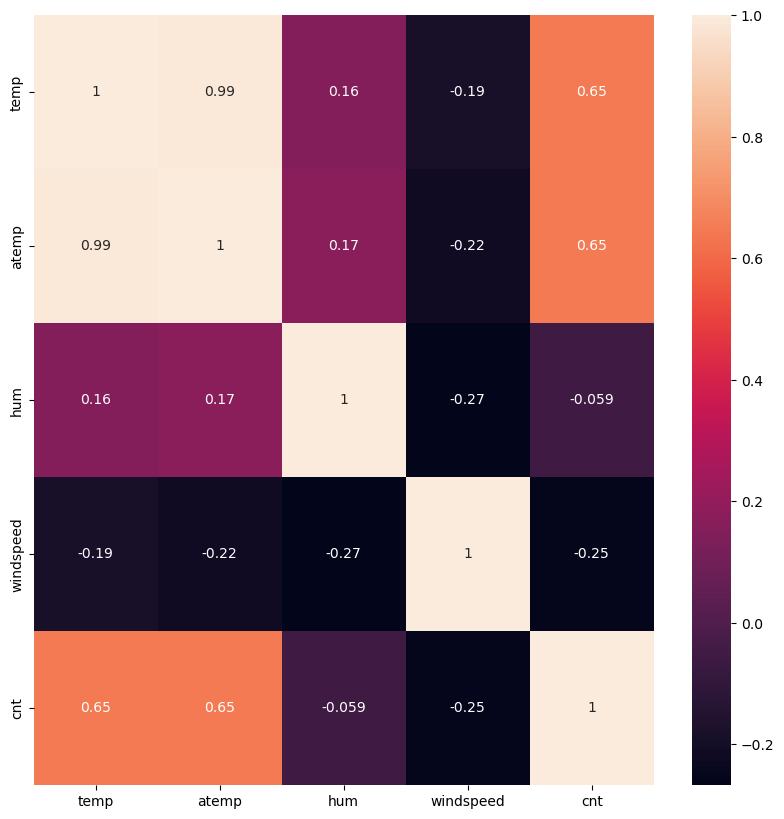

In [420]:
# correlation
plt.figure(figsize=[10,10])
sns.heatmap(df_train[num_vars].corr(),annot=True)

In [421]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_rain_thunderstorm',
       'weathersit_misty'],
      dtype='object')

## Building linear regression model


In [422]:
# creating X_train and y_train
# y_train- only dependent variable count, X_train-all independent/predictor variables

y_train = df_train.pop('cnt')
X_train = df_train


In [423]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [424]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_rain_thunderstorm',
       'weathersit_misty'],
      dtype='object')

In [425]:
# As X_train having 29 columns which is large in number. Lets perform Automated Feature selection process using RFE.

## Recursive Feature Elimination

In [426]:
# Creating linearregression object
lm = LinearRegression()

# fitting X_train and y_train to linear model
lm.fit(X_train,y_train)

# RFE needs model name and number of features to select, Running RFE
rfe = RFE(estimator=lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [427]:
# rfe.support_ = assigns boolean value for each feature
# rfe.ranking_ = assign Ranks to each feature

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_light_rain_thunderstorm', True, 1),
 ('weathersit_misty', True, 1)]

In [428]:
# List of Features not supported by RFE
X_train.columns[~ rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [429]:
# List of RFE supported Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_sat',
       'weathersit_light_rain_thunderstorm', 'weathersit_misty'],
      dtype='object')

## Building Model Using StatsModel

In [430]:
# creating a test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [431]:
# adding constant because intercept may not be zero all the times.
X_train_rfe = sm.add_constant(X_train_rfe)

In [432]:
# fitting linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [433]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        21:27:25   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2519      0.036      6.969      0.000       0.181       0.323
yr                                     0.2305      0.008     28.795      0.000       0.215       0.246
holiday                               -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                             0.0433      0.012      3.762      0.000       0.021       0.066
temp                                   0.5096      0.034     14.837      0.000       0.442       0.577
hum                                   -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                             -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring                         -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer                          0.0508      0.015      3.423      0.001       0.022       0.080
season_winter                          0.0933      0.017      5.403      0.000       0.059       0.127
mnth_jan                              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_jul                              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_sep                               0.0814      0.016      4.945      0.000       0.049       0.114
weekday_sat                            0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_light_rain_thunderstorm    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_misty                      -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [434]:
## Checking VIF's

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,const,84.60
7,season_spring,5.08
4,temp,3.89
9,season_winter,3.59
8,season_summer,2.65
5,hum,1.91
3,workingday,1.88
13,weekday_sat,1.78
10,mnth_jan,1.57
15,weathersit_misty,1.57


In [435]:
# drop season_spring variable as vif is greater than 5
X_train_rfe.drop('season_spring', axis=1, inplace=True)

In [436]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          5.98e-191
Time:                        21:27:26   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2011      0.030      6.739      0.000       0.142       0.260
yr                                     0.2294      0.008     28.555      0.000       0.214       0.245
holiday                               -0.0596      0.027     -2.206      0.028      -0.113      -0.007
workingday                             0.0437      0.012      3.774      0.000       0.021       0.066
temp                                   0.5676      0.025     22.556      0.000       0.518       0.617
hum                                   -0.1659      0.037     -4.446      0.000      -0.239      -0.093
windspeed                             -0.1935      0.025     -7.606      0.000      -0.243      -0.144
season_summer                          0.0757      0.011      6.950      0.000       0.054       0.097
season_winter                          0.1255      0.011     11.081      0.000       0.103       0.148
mnth_jan                              -0.0393      0.017     -2.271      0.024      -0.073      -0.005
mnth_jul                              -0.0442      0.018     -2.486      0.013      -0.079      -0.009
mnth_sep                               0.0928      0.016      5.847      0.000       0.062       0.124
weekday_sat                            0.0539      0.015      3.696      0.000       0.025       0.082
weathersit_light_rain_thunderstorm    -0.2433      0.026     -9.320      0.000      -0.295      -0.192
weathersit_misty                      -0.0541      0.010     -5.221      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       60.708   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.130
Skew:                          -0.660   Prob(JB):                     3.35e-29
Kurtosis:                       5.104   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [437]:
## Checking VIF's

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.89
3,workingday,1.88
12,weekday_sat,1.78
14,weathersit_misty,1.56
9,mnth_jan,1.55
8,season_winter,1.53
10,mnth_jul,1.43
7,season_summer,1.41


## Residual Analysis

In [438]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep',
       'weekday_sat', 'weathersit_light_rain_thunderstorm',
       'weathersit_misty'],
      dtype='object')

In [439]:
y_train_cnt = lm.predict(X_train_rfe)


<Axes: ylabel='Density'>

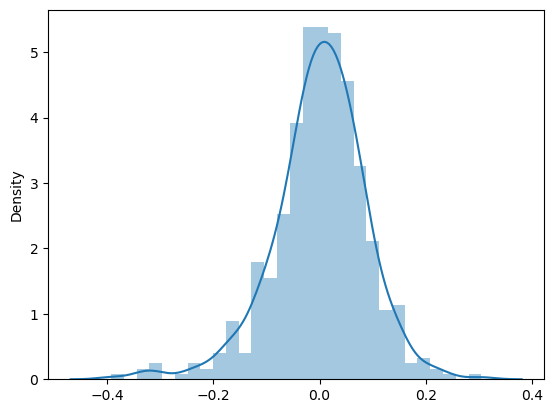

In [440]:
# plotting residuals
# Checking most important assumption of linear regression model, Error terms normally distributed with mean zero.
res = y_train - y_train_cnt
sns.distplot(res)

In [441]:
# mean of errors is zero, satisfied important assumption of linear regression model

<Axes: >

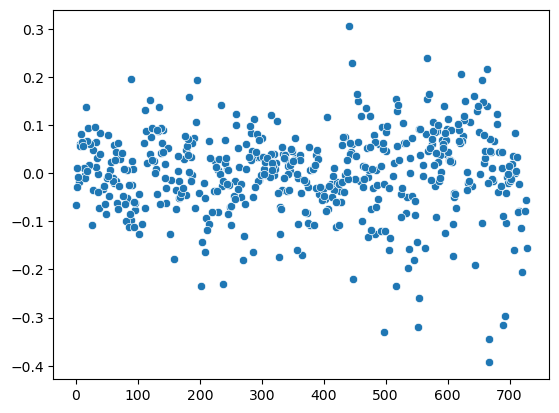

In [442]:
# scatter plotting residuals and checking if any visible patterns and dependency between error terms
sns.scatterplot(res)

In [443]:
# Error Terms are independent of each other.There is no visible pattern between them
# most of the error terms are at and near to zero
# variance is almost same for all error terrms(Homescedasticity).

## Making Predictions

In [444]:
# rescaling these continuous variables 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt' 
# No need to create scaler object again as it is already created during train set rescaling

df_test[num_vars] = scaler.transform(df_test[num_vars])  # Note: not fit_transform.
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain_thunderstorm,weathersit_misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [445]:
df_test.shape

(220, 30)

In [446]:
# creating X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test


In [447]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep',
       'weekday_sat', 'weathersit_light_rain_thunderstorm',
       'weathersit_misty'],
      dtype='object')

In [448]:
X_train_rfe.drop('const', axis=1, inplace=True)

In [449]:
# some columns are dropped from X_train during Feature selecton process, drop those columns from X_test too.

X_test_new = X_test[X_train_rfe.columns]

In [450]:
# add constant
X_test_new = sm.add_constant(X_test_new)

In [451]:
df_test.shape

(220, 29)

In [452]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [453]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep',
       'weekday_sat', 'weathersit_light_rain_thunderstorm',
       'weathersit_misty'],
      dtype='object')

In [454]:
# predicted y_test
y_test_pred = lm.predict(X_test_new)

In [455]:
# evaluating model by calculating R2score of test set

r2 = r2_score(y_true = y_test,y_pred = y_test_pred)
r2

0.8053484636863371

In [456]:
# Training set R2 score is 0.805. What model learned from training set, it is also able to generalise on test_set.

#Calculate Adjusted R squared for test set

$ Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] $
- R2 = R squared
- n = number of rows in a dataset
- k = number of predictor variables


In [457]:
# number of rows in test set
n = X_test_new.shape[0]

In [458]:
# number of predictor variables 
k = int(len(X_test_new.columns))

In [459]:
print(r2,n,k)

0.8053484636863371 220 15


In [460]:
# we already calculated r2
# Adjusted R2 for test set
adjusted_R2 = 1- ((1-r2) * ((n-1)/(n-k-1)))
adjusted_R2

0.7910358507220971

In [461]:
# Training set Adjusted R2 score is 0.84. What model learned from training set, it is also able to generalise on test_set.

##### Linear Equation

cnt = 0.229*yr - 0.059*holiday + 0.043*workingday + 0.567*temp - 0.165*hum - 0.193*windspeed + 0.0757season_summer + 0.125*season_winter - 0.039*mnth_jan - 0.044*mnth_jul + 0.092*mnth_sep + 0.053*weekday_sat - 0.243*weathersit_light_rain_thunderstor-0.054*weathersit_misty

###### Inferences from trained model

<br>

- <font color="green"> For every year count increases by 0.229 
<br>
    
- <font color="red"> For unit increase in holiday, count decreases by 0.059
<br>
    
- <font color="green"> For unit increase in working day, Count increases by 0.043
<br>
    
- <font color="green"> For unit increase in temperature, Count increases by 0.567
<br>
    
- <font color="red"> For unit increase in Humidity, Count decreases by 0.165
<br>    
    
- <font color="red"> For unit increase in Windspeed, Count decreases by 0.193
<br>
    
- <font color="green"> During summer season, Count increases by 0.075
<br>    
    
- <font color="green"> During winter season, Count increases by 0.125
<br>
    
- <font color="red"> In January month, Count decreases by 0.039
<br>
    
- <font color="red"> In July month, Count decreases by 0.044
<br>
    
- <font color="green"> Whereas,In September month, Count Increases by 0.092
<br>
    
- <font color="green"> On saturdays, Count increases by 0.053
<br>
    
- <font color="red"> Weather situation as light rain and thunderstorm, Decreases the count by 0.243
<br> 

- <font color="red"> Weather situation misty with broken clouds, Decreases the count by 0.054
<br> 
    